## Spotify k-Means
LSDM Group Project

Bryce Hinkley

# Imports and Pips

In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 9.9 MB/s eta 0:00:00


In [ ]:
#Imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn import preprocessing
import pandas as pd
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import sys
from pprint import pprint
import time
from __future__ import print_function
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

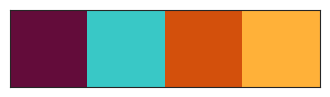

In [ ]:

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id='84c1030768104363b1bc43ce64e951d1',client_secret='839912b6ecc045c1b82fc4a2eed9743d'))

# Defs and Data Collection

In [ ]:
#Helper functions

def get_playlist_tracks(playID):
  temp_list = []
  length = 0
  response = sp.playlist_items(pl_id,
                                  offset=0,
                                  fields='items.track.id,total',
                                  additional_types=['track'])
  length = response['total']
  thing = response['items']
  # print(length)
  while True:
    if(length>100):
      for i in range(100):
        temp_list.insert(-1,thing[i]['track']['id'])
      length -= 100
    else:
      response = sp.playlist_items(pl_id,
                                      offset=length,
                                      fields='items.track.id,total',
                                      additional_types=['track'])
      for i in range(length):
        temp_list.insert(-1,thing[i]['track']['id'])
      break
  return temp_list

In [ ]:
playlist_list = [
'37i9dQZF1DX7qK8ma5wgG1',
'37i9dQZF1DX3YSRoSdA634',
'37i9dQZF1DXbEm2sKzgoJ8',
'37i9dQZF1DX5IDTimEWoTd',
'37i9dQZF1DX0MLFaUdXnjA',
'37i9dQZF1DX889U0CL85jj',
'37i9dQZF1DWY1j3jZdCWOQ',
'37i9dQZF1DX9qNs32fujYe',
'4zZpffTnguBELBde2Ar30Z',
'37i9dQZF1DX3rxVfibe1L0',
'37i9dQZF1DX4fpCWaHOned',
'37i9dQZF1DWSf2RDTDayIx'
]
playlist_mood_titles = [
'sad',
'sad',
'romantic',
'romantic',
'relaxing',
'relaxing',
'angst',
'angry',
'angry',
'happy',
'confident',
'happy'
]

playlist_mood_values = [
0,
0,
1,
1,
2,
2,
3,
4,
4,
5,
6,
5
]


In [ ]:
playlist_mood_titles[playlist_list.index('37i9dQZF1DWSf2RDTDayIx')]

'happy'

In [ ]:
# pl_id = '37i9dQZF1DWSf2RDTDayIx'
total_mood_val = []
temp_df = pd.DataFrame()
data_df = pd.DataFrame(columns=['track_id'])

for pl_id in playlist_list:
  # total_id.insert(-1,get_playlist_tracks(pl_id))
  temp_df = pd.DataFrame(get_playlist_tracks(pl_id),columns=['track_id'])
  # total_mood_val += list(np.full(len(temp_df),playlist_list.index(pl_id)))
  total_mood_val += list(np.full(len(temp_df),playlist_mood_titles[playlist_list.index(pl_id)]))
  #print(list(np.full(len(temp_df),playlist_mood_titles[playlist_list.index(pl_id)])))
  data_df = data_df.append(temp_df,ignore_index=True)
# print(len(total_id))
data_df['mood'] = total_mood_val

In [ ]:
sp.trace = True

songs = pd.DataFrame()
start = time.time()
for i in range(len(data_df)):
  if len(sys.argv) > 1:
      #print(track_id)
      features = sp.audio_features(data_df['track_id'][i])
      data = json.loads(json.dumps(features))
      songs = songs.append(data)

delta = time.time() - start
songs['mood'] = data_df['mood']
print("features retrieved in %.2f seconds" % (delta,))
# print(songs.head())
print(songs.columns)

features retrieved in 114.44 seconds
Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'mood'],
      dtype='object')


In [ ]:
targets = songs['mood']
# features_df = songs[['acousticness',	'danceability',	'energy',	'liveness',	'speechiness',	'instrumentalness',	'valence']]
features_df = songs.drop(['key','type','uri','duration_ms','id','track_href','analysis_url','time_signature','tempo','loudness','mode','mood'], axis=1)

# loudness = songs[['loudness']].values
# # print(loudness)
# min_max_scaler = preprocessing.MinMaxScaler()
# loudness_scaled = min_max_scaler.fit_transform(loudness)

# tempo = songs[['tempo']].values
# # print(loudness)
# min_max_scaler = preprocessing.MinMaxScaler()
# tempo_scaled = min_max_scaler.fit_transform(tempo)

# features_df['loudness'] = loudness_scaled
# features_df['tempo'] = tempo_scaled
features_df = features_df.reset_index(drop=True)
print(features_df.head())

   danceability  energy  speechiness  acousticness  instrumentalness  \
0         0.467   0.359       0.0815         0.843          0.000000   
1         0.620   0.379       0.0412         0.797          0.000000   
2         0.637   0.513       0.0367         0.518          0.000000   
3         0.547   0.222       0.0458         0.962          0.000093   
4         0.400   0.641       0.0674         0.214          0.000000   

   liveness  valence  
0    0.0913    0.210  
1    0.1950    0.509  
2    0.1240    0.234  
3    0.1010    0.528  
4    0.0656    0.393  


# K-means

In [ ]:
#K-means
from sklearn.cluster import KMeans

# songs_features = songs[['danceability',	'speechiness',	'acousticness',	'liveness']].copy()
# songs_features['loudness'] = loudness_scaled
#songs_features['tempo_scaled'] = tempo_scaled
#songs_features = songs_features['danceability',	'loudness',	'speechiness',	'acousticness',	'liveness']
# print(songs_features['loudness'])
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features_df)
    Sum_of_squared_distances.append(km.inertia_)


In [ ]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,30):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(features_df)
    centers = clusterer.cluster_centers_

    score = silhouette_score (features_df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41289016900714315)
For n_clusters = 3, silhouette score is 0.30322771401127613)
For n_clusters = 4, silhouette score is 0.31263779978818007)
For n_clusters = 5, silhouette score is 0.24473535453065434)
For n_clusters = 6, silhouette score is 0.22882992588148385)
For n_clusters = 7, silhouette score is 0.23428981152031222)
For n_clusters = 8, silhouette score is 0.2229186790864192)
For n_clusters = 9, silhouette score is 0.21832682090151262)
For n_clusters = 10, silhouette score is 0.2188433489847861)
For n_clusters = 11, silhouette score is 0.2131134414991714)
For n_clusters = 12, silhouette score is 0.21267169458006216)
For n_clusters = 13, silhouette score is 0.20941233462045553)
For n_clusters = 14, silhouette score is 0.20809714296850962)
For n_clusters = 15, silhouette score is 0.20671656477944925)
For n_clusters = 16, silhouette score is 0.19333278209105284)
For n_clusters = 17, silhouette score is 0.19656510871836688)
For n_clusters = 18

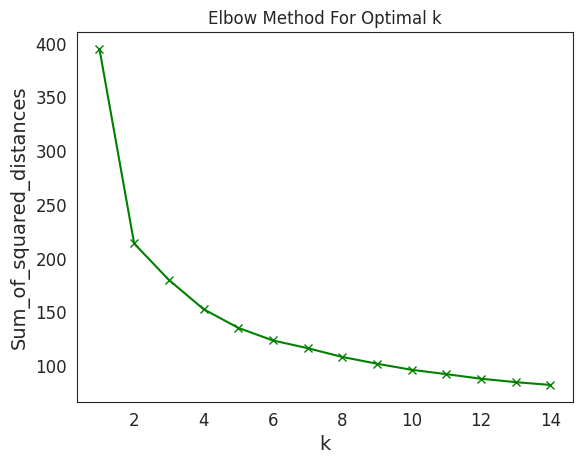

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(features_df)

KMeans(n_clusters=7)

In [ ]:
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(features_df)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_df)

/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


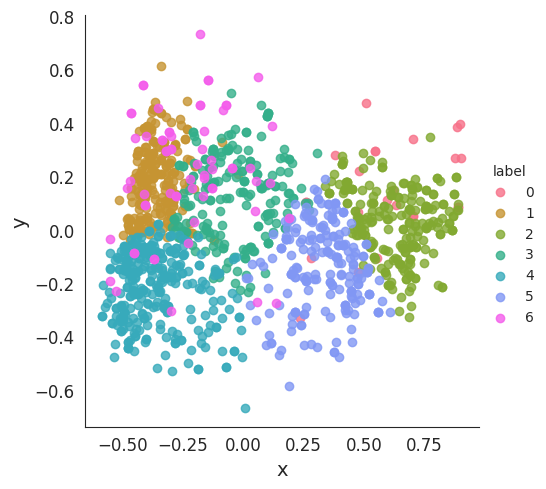

In [ ]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [ ]:
print(features_df.iloc[1200:1210])
print(kmeans.predict(features_df.iloc[1200:1210]))

      danceability  energy  speechiness  acousticness  instrumentalness  \
1200         0.626   0.849       0.1230        0.0732          0.000000   
1201         0.743   0.837       0.0649        0.0172          0.000000   
1202         0.720   0.630       0.2770        0.6730          0.000000   
1203         0.739   0.586       0.0472        0.0245          0.000252   
1204         0.736   0.906       0.0480        0.1640          0.585000   
1205         0.687   0.818       0.0778        0.0112          0.000000   
1206         0.621   0.785       0.1100        0.0165          0.000006   
1207         0.578   0.912       0.1140        0.0166          0.003620   
1208         0.763   0.782       0.0346        0.1820          0.000007   
1209         0.730   0.907       0.0606        0.0921          0.114000   

      liveness  valence  
1200    0.5930    0.898  
1201    0.0743    0.263  
1202    0.0936    0.607  
1203    0.3080    0.444  
1204    0.1060    0.698  
1205    0.2480    

In [ ]:
from joblib import dump
dump(kmeans, 'spotify_kmeans_model.joblib')

['spotify_kmeans_model.joblib']

In [ ]:
pca.explained_variance_ratio_


array([0.56460117, 0.15278385])

In [ ]:
print (pd.DataFrame(pca.components_,columns=features_df.columns,index = ['PC-1','PC-2']))

      danceability    energy  speechiness  acousticness  instrumentalness  \
PC-1     -0.083594 -0.542961    -0.043356      0.786238          0.019875   
PC-2     -0.402667  0.056000    -0.016176     -0.281202          0.315332   

      liveness   valence  
PC-1 -0.077290 -0.267932  
PC-2  0.069107 -0.806956  


In [ ]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()


2    304
3    295
0    274
1    240
4    138
6     70
5     32
Name: label, dtype: int64

In [ ]:
songs[songs['label'] == 0].tail(50)

In [ ]:
songs[songs['label'] == 1].tail(20)

In [ ]:
songs[songs['label'] == 2].tail(20)

In [ ]:
songs[songs['label'] == 3].tail(20)

In [ ]:
songs[songs['label'] == 4].tail(20)

In [ ]:
songs[songs['label'] == 5].tail(20)

In [ ]:
songs[songs['label'] == 6].tail(20)

6 - ANGER

5 - r e l a x e d

4 - sad!

3 - ANGER or ENERGIZEDENERGIZEDENERGIZEDENERGIZEDENERGIZEDENERGIZED

2 - Happy :)

1 - sad...

0 - h a p p y (Happy but relaxed I think)

In [ ]:
!pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 34.7 MB/s eta 0:00:00


In [ ]:
import mysql.connector

In [ ]:
# mydb = mysql.connector.connect(
#   host="EXAMPLE",
#   user="EXAMPLE",
#   password="EXAMPLE",
#   database="EXAMPLE"
# )

# try:
#     query = "Select * from spotify_track"
#     result_dataFrame = pd.read_sql(query,mydb)
#     mydb.close() #close the connection
#     print(result_dataFrame.head())
# except Exception as e:
#     mydb.close()
#     print(str(e))

<ipython-input-22-f4f308e38730>:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_dataFrame = pd.read_sql(query,mydb)


                 track_id                album_id                  name  \
0  04rDkoTrRwMHAvxaUiXuNB  3sxKuVQYK901ZyxTpLMFWG            Alles Lüge   
1  0C3UVswa3vCrbL1fRyMwTL  4gKogAniknUzrLNCBnMAlt                Closer   
2  0Grv4X2n2ZamotZo8LHTtk  3ny3DruClpPaFHHp7MIFai     Sueña Dulce Nena   
3  0001Lyv0YTjkZSqzT4WkLy  3nQbcYEXJ3QQkkObxmm76Y  Eye Of The Hurricane   
4  0C3VVxEbbYSadhlvBRq0Si  47P5zEcCBsYXLGeTNrhxOz     Mean Blue Spirits   

                                          track_href  \
0  https://open.spotify.com/track/04rDkoTrRwMHAvx...   
1  https://open.spotify.com/track/0C3UVswa3vCrbL1...   
2  https://open.spotify.com/track/0Grv4X2n2ZamotZ...   
3  https://open.spotify.com/track/0001Lyv0YTjkZSq...   
4  https://open.spotify.com/track/0C3VVxEbbYSadhl...   

                                     cover_image_url release_date  \
0  https://i.scdn.co/image/ab67616d0000b27380fe9c...   1993-08-09   
1  https://i.scdn.co/image/ab67616d0000b2737555c8...   2022-11-30   
2  ht

In [ ]:
# try:
#     query = "Select * from spotify_track"
#     result_dataFrame = pd.read_sql(query,mydb)
#     mydb.close() #close the connection
#     print(result_dataFrame.head())
# except Exception as e:
#     mydb.close()
#     print(str(e))

In [ ]:

label_results = pd.DataFrame(result_dataFrame['track_id'], columns=['track_id'])
label_results

In [ ]:
label_results['emotion_analysis'] = kmeans.predict(result_dataFrame[['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence']])

In [ ]:
labels = kmeans.predict(result_dataFrame[['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence']])

In [ ]:
label_results['emotion_analysis'] = labels

In [ ]:
label_results.head()

In [ ]:
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
list_colors = []
for i in range(len(result_dataFrame['cover_image_url'])):
  try:
    img = io.imread(result_dataFrame['cover_image_url'])

    pixels = np.float32(img.reshape(-1, 3))

    n_colors = 5
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS

    _, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
    _, counts = np.unique(labels, return_counts=True)

    dominant = palette[np.argmax(counts)]
    dominant = [int(x) for x in dominant]
    dominant = '#{:02x}{:02x}{:02x}'.format(*dominant)
    list_colors.append(dominant)
    #hex_color_analysis
  except:
    list_colors.append('#FFFFFF')
print(list_colors)

In [ ]:
from joblib import load

# Load the trained model from a file
kmeans = load('spotify_kmeans_model.joblib')

In [ ]:
print(kmeans.predict(features_df.iloc[1200:1210]))

[0 5 0 2 6 6 6 6 3 0]


In [ ]:
img = io.imread(result_dataFrame['cover_image_url'])

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
img = io.imread(result_dataFrame['cover_image_url'])